# Anomaly Detection Model
>  Includes the anomaly detection algorithm, i.e. the prediction model, the loss functions and the anomaly score calculation and classification, as well as the metric computation.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Only-Control-flow" data-toc-modified-id="Only-Control-flow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Only Control-flow</a></span><ul class="toc-item"><li><span><a href="#Load-Log" data-toc-modified-id="Load-Log-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Log</a></span></li><li><span><a href="#Create-PPObj-with-vocab-and-dataloaders" data-toc-modified-id="Create-PPObj-with-vocab-and-dataloaders-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create PPObj with vocab and dataloaders</a></span></li><li><span><a href="#Define-Deep-Learning-Model" data-toc-modified-id="Define-Deep-Learning-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Define Deep Learning Model</a></span></li><li><span><a href="#Define-Training-Loop-and-Helper-Functions" data-toc-modified-id="Define-Training-Loop-and-Helper-Functions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Define Training Loop and Helper Functions</a></span></li><li><span><a href="#Train-prediction-model" data-toc-modified-id="Train-prediction-model-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Train prediction model</a></span></li><li><span><a href="#Load-Test-Data" data-toc-modified-id="Load-Test-Data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Load Test Data</a></span></li><li><span><a href="#Create-PPOBJ-of-test-data-with-same-vocab" data-toc-modified-id="Create-PPOBJ-of-test-data-with-same-vocab-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Create PPOBJ of test data with same vocab</a></span></li><li><span><a href="#Apply-Prediction-Model" data-toc-modified-id="Apply-Prediction-Model-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Apply Prediction Model</a></span></li><li><span><a href="#Calculate-Anomaly-Score" data-toc-modified-id="Calculate-Anomaly-Score-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Calculate Anomaly Score</a></span></li><li><span><a href="#Classify-Anomalies-based-of-Threshhold,-get-predictions-and-ground-truth,-compute-a-few-metrics" data-toc-modified-id="Classify-Anomalies-based-of-Threshhold,-get-predictions-and-ground-truth,-compute-a-few-metrics-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Classify Anomalies based of Threshhold, get predictions and ground truth, compute a few metrics</a></span></li><li><span><a href="#Get-NSP-Accuracy-on-Inrference" data-toc-modified-id="Get-NSP-Accuracy-on-Inrference-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Get NSP Accuracy on Inrference</a></span></li></ul></li><li><span><a href="#Multivariate-Anomaly-Detection" data-toc-modified-id="Multivariate-Anomaly-Detection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multivariate Anomaly Detection</a></span><ul class="toc-item"><li><span><a href="#Load-Event-Log:" data-toc-modified-id="Load-Event-Log:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Event Log:</a></span></li><li><span><a href="#Create-Training-Data-Loaders-and-Vocab:" data-toc-modified-id="Create-Training-Data-Loaders-and-Vocab:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create Training Data Loaders and Vocab:</a></span></li><li><span><a href="#Create-Multivariate-Prediction-Model" data-toc-modified-id="Create-Multivariate-Prediction-Model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create Multivariate Prediction Model</a></span></li><li><span><a href="#Define-Multi-Loss-and--Metrics" data-toc-modified-id="Define-Multi-Loss-and--Metrics-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Define Multi-Loss and -Metrics</a></span></li><li><span><a href="#Training-of-the-prediction-network" data-toc-modified-id="Training-of-the-prediction-network-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Training of the prediction network</a></span></li><li><span><a href="#Load-Test-Log-for-Inference" data-toc-modified-id="Load-Test-Log-for-Inference-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Load Test Log for Inference</a></span></li><li><span><a href="#Compute-Anomaly-Score" data-toc-modified-id="Compute-Anomaly-Score-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Compute Anomaly Score</a></span></li><li><span><a href="#Anomaly-Classification" data-toc-modified-id="Anomaly-Classification-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Anomaly Classification</a></span></li></ul></li><li><span><a href="#Plot-Anomaly-Scores-for-a-Trace" data-toc-modified-id="Plot-Anomaly-Scores-for-a-Trace-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot Anomaly Scores for a Trace</a></span></li></ul></div>

In [ ]:
#default_exp anomaly

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#export

from dapnn.imports import *
from dapnn.data_processing import *

In [ ]:
#export
import warnings
warnings.filterwarnings(action='once')

In [ ]:
notebook2script(fname='03_anomaly.ipynb')

Converted 03_anomaly.ipynb.


## Only Control-flow 

### Load Log

In [ ]:
log_name='pdc_2020_0101100'

In [ ]:
log = import_log(f'data/csv/PDC2020_training/{log_name}.csv.gz')
log.head(20)

,activity,trace_id,event_id
trace_id,,,
trace 1,###start###,trace 1,0
trace 1,t31,trace 1,1
trace 1,t41,trace 1,2
trace 1,t26,trace 1,3
trace 1,t36,trace 1,4
trace 1,t44,trace 1,5
trace 1,t54,trace 1,6
trace 1,t33,trace 1,7
trace 1,t23,trace 1,8


### Create PPObj with vocab and dataloaders

In [ ]:
#export
def training_dl(log,cat_names='activity',seed=45,ws=5,bs=32):
    categorify=Categorify()

    o=PPObj(log,procs=categorify,cat_names=cat_names,y_names=cat_names,splits=split_traces(log,test_seed=seed,validation_seed=seed))
    dls=o.get_dls(windows=partial(windows_fast,ws=ws),bs=bs)
    return o,dls,categorify



In [ ]:
o,dls,categorify = training_dl(log)

### Define Deep Learning Model

In [ ]:
x,y= dls.one_batch()

In [ ]:
class ControlFlowModel(torch.nn.Module) :
    def __init__(self, o) :
        super().__init__()
        hidden=25
        vocab_act=len(o.procs.categorify['activity'])
        emb_dim_act = int(np.sqrt(vocab_act))+1

        self.emb_act = nn.Embedding(vocab_act,emb_dim_act)
        
        self.lstm_act = nn.LSTM(emb_dim_act, hidden, batch_first=True, num_layers=2)

        self.linear_act = nn.Linear(hidden, vocab_act)

    def forward(self, xcat):
        xcat=xcat[:,0]
        x_act=xcat
        x_act = self.emb_act(x_act)
        x_act,_ = self.lstm_act(x_act)
        x_act = x_act[:,-1]
        x_act = self.linear_act(x_act)
        return x_act

In [ ]:
m=ControlFlowModel(o)


In [ ]:
pred=m(x.cpu())

In [ ]:
y[0].cpu()

tensor([17, 21, 13,  8, 21, 11, 13, 23,  1, 16, 24,  1, 15,  9, 26, 14, 10, 24,
        23, 11, 21, 24, 23,  3,  6, 21, 12, 24,  8,  6,  6, 13])

In [ ]:
squeeze_cross_entropy = lambda x,y:F.cross_entropy(x,y[0])
squeeze_accuracy =lambda x,y:accuracy(x,y[0])


In [ ]:
squeeze_cross_entropy(pred.cuda(),y),squeeze_accuracy(pred.cuda(),y)

(tensor(3.2662, device='cuda:0', grad_fn=<NllLossBackward>),
 TensorBase(0.0312, device='cuda:0'))

### Define Training Loop and Helper Functions

In [ ]:
#export
class HideOutput:
    'A utility function that hides all outputs in a context'
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [ ]:
#export
def training_loop(learn,epoch,print_output,lr_find,fixed_learning_rate=0.01):
    '''
    Basic training loop that uses learning rate finder and one cycle training. 
    See fastai docs for more information
    '''
    if lr_find:
        lr=np.median([learn.lr_find(show_plot=print_output)[0] for i in range(5)])
        learn.fit_one_cycle(epoch,float(lr))
    else: learn.fit(epoch,fixed_learning_rate)

In [ ]:
#export
def train_validate(dls,m,metrics=accuracy,loss=F.cross_entropy,epoch=20,print_output=True,model_dir=".",lr_find=True,
                   patience=5,min_delta=0.005,show_plot=True,store_path='tmp',model_name='.model'):
    '''
    Trains a model on the training set with early stopping based on the validation loss.
    Afterwards, applies it to the test set.
    '''
    cbs = [
      EarlyStoppingCallback(monitor='valid_loss',min_delta=min_delta, patience=patience),
      SaveModelCallback(fname=model_name),
      ]
    learn=Learner(dls, m, path=store_path, model_dir=model_dir, loss_func=loss ,metrics=metrics,cbs=cbs)

    if print_output:
        training_loop(learn,epoch,show_plot,lr_find=lr_find)
        return learn.validate(dl=dls[2])
    else:
        with HideOutput(),learn.no_bar(),learn.no_logging():
            training_loop(learn,epoch,show_plot,lr_find=lr_find)
            return learn.validate(dl=dls[2])

### Train prediction model

epoch,train_loss,valid_loss,,time
0,2.198070,2.040039,0.382626,00:06
1,1.438702,1.347889,0.498292,00:05
2,1.207558,1.151093,0.516349,00:05
3,1.163940,1.138804,0.495852,00:05
4,1.113219,1.103945,0.509029,00:05
5,1.114303,1.102395,0.510981,00:05
6,1.093438,1.097265,0.488043,00:05
7,1.056479,1.053188,0.504148,00:06
8,1.083565,1.046009,0.522694,00:05
9,1.035178,1.065885,0.510005,00:06


/home/lahann/miniconda3/envs/dapnn/lib/python3.8/site-packages/fastai/callback/schedule.py:72: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx = min((pos >= pcts).nonzero().max(), pct_lim)


Better model found at epoch 0 with valid_loss value: 2.040038824081421.
Better model found at epoch 1 with valid_loss value: 1.3478893041610718.
Better model found at epoch 2 with valid_loss value: 1.1510932445526123.
Better model found at epoch 3 with valid_loss value: 1.1388036012649536.
Better model found at epoch 4 with valid_loss value: 1.103945255279541.
Better model found at epoch 5 with valid_loss value: 1.1023954153060913.
Better model found at epoch 6 with valid_loss value: 1.0972651243209839.
Better model found at epoch 7 with valid_loss value: 1.0531877279281616.
Better model found at epoch 8 with valid_loss value: 1.046008825302124.
Better model found at epoch 10 with valid_loss value: 1.0227481126785278.
Better model found at epoch 15 with valid_loss value: 1.0215957164764404.
No improvement since epoch 10: early stopping


Better model found at epoch 0 with valid_loss value: 0.5259528756141663.


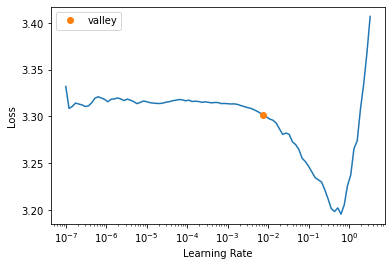

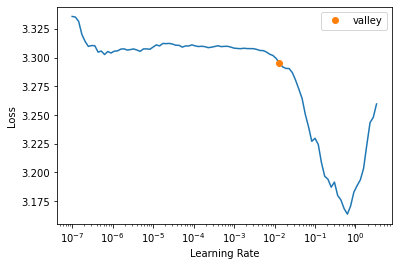

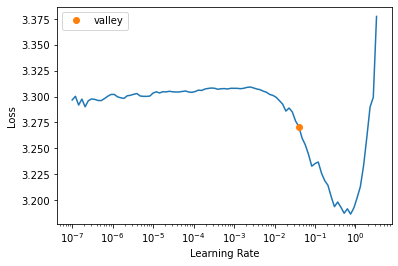

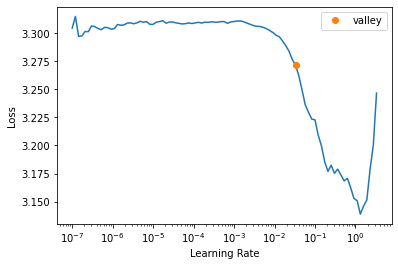

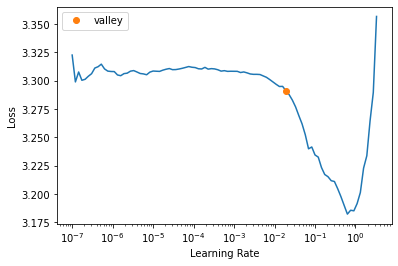

In [ ]:
train_val = train_validate(dls,m,epoch=25,metrics=squeeze_accuracy,loss=squeeze_cross_entropy)

### Load Test Data

In [ ]:
test_log = import_log(f'data/csv/PDC2020_ground_truth/{log_name}.csv.gz')
test_log.head(25)

,activity,trace_id,case:pdc:costs,normal,event_id
trace_id,,,,,
trace 1,###start###,trace 1,0.0,True,0
trace 1,t21,trace 1,0.0,True,1
trace 1,t32,trace 1,0.0,True,2
trace 1,t26,trace 1,0.0,True,3
trace 1,t41,trace 1,0.0,True,4
trace 1,t35,trace 1,0.0,True,5
trace 1,t44,trace 1,0.0,True,6
trace 1,t34,trace 1,0.0,True,7
trace 1,t24,trace 1,0.0,True,8


### Create PPOBJ of test data with same vocab

In [ ]:
#export
def process_test(test_log,categorify,cat_names='activity'):
    o=PPObj(test_log,procs=categorify,cat_names=cat_names,y_names=cat_names,do_setup=False)
    o.process()
    return o


In [ ]:
o = process_test(test_log,categorify)

### Apply Prediction Model

In [ ]:
#export
def predict_next_step(o,m,ws=5):
    wds,idx=partial(windows_fast,ws=ws)(o.xs, o.event_ids)
    res=(m(LongTensor(wds).cuda()))
    return res,idx

In [ ]:
nsp,idx=predict_next_step(o,m)

### Calculate Anomaly Score

In [ ]:
def calc_anomaly_score(res,o,idx):
    sm = nn.Softmax(dim=1)
    y = o.items['activity'].iloc[idx].values
    p = sm(res)
    pred = p.max(1)[0]
    truth = p[list(range(0, len(y))),y]
    a_score = ((pred - truth) / pred).cpu().detach().numpy()
    return a_score

In [ ]:
anomaly_score = calc_anomaly_score(nsp,o,idx)

### Classify Anomalies based of Threshhold, get predictions and ground truth, compute a few metrics

In [ ]:
def get_anomalies(a_score,o,idx,threshhold=0.98):
    df=pd.DataFrame(columns=[ 'a_score'])
    df['a_score'] = a_score
    df['trace_id'] = o.items.iloc[idx]['trace_id'].values
    df['normal'] = o.items.iloc[idx]['normal'].values
    df

    y_true = (df.loc[df.trace_id.drop_duplicates().index].normal==False).tolist()
    cases = df.loc[df.trace_id.drop_duplicates().index].trace_id.tolist()
    anomalies = set(list(df.loc[df['a_score'] > threshhold]['trace_id']))
    y_pred=[case in anomalies for case in cases]
    return y_pred,y_true

In [ ]:
y_pred, y_true = get_anomalies(anomaly_score,o,idx)

In [ ]:
f1_score(y_true, y_pred)

0.8527131782945736

In [ ]:
accuracy_score(y_true, y_pred)

0.848

In [ ]:
precision_score(y_true,y_pred)

0.7547169811320755

In [ ]:
recall_score(y_true,y_pred)

0.9799554565701559

### Get NSP Accuracy on Inrference


In [ ]:
#export
def nsp_accuracy(o,idx,nsp):
    nsp_y=o.ys.iloc[idx]
    nsp_acc= accuracy(nsp,tensor(nsp_y.values).cuda())
    return nsp_acc

In [ ]:
nsp_accuracy(o,idx,nsp)

TensorBase(0.5015, device='cuda:0')

## Multivariate Anomaly Detection

Rewrite the prediction model to support multivariate prediction. Define attr_dict that maps event log to considerable attributes. Dynamically adapt preprocessing, network architecture, loss function, and anomaly score computation

In [ ]:
#export
attr_dict={}
for i in [i for i in glob.glob('data/csv/binet_logs/*')]:
    if 'bpic12'in i:
        attr_dict[i] =['activity']
    elif 'bpic13' in i:
        attr_dict[i]=['activity','org:group',
'org:resource', 'org:role', 'organization country', 'product', 'resource country','impact']
    elif 'bpic17' in i:  
        attr_dict[i]=['activity','EventOrigin','org:resource']
    elif 'bpic15' in i:
        attr_dict[i]=['activity', 'action_code', 'activityNameEN', 'activityNameNL','monitoringResource', 'org:resource', 'question']
    elif '-1.' in i:
        attr_dict[i]=['activity','user']
    elif '-2.' in i:
        attr_dict[i]=['activity','user','day']
    elif '-3.' in i:
        attr_dict[i]=['activity','user','day','country']
    elif '-4.' in i:
        attr_dict[i]=['activity','user','day','country','company']

In [ ]:
#export
def get_attr(attr_dict,log_name):
    if log_name in attr_dict: 
        return attr_dict[log_name]
    else: return ['activity']

### Load Event Log:

In [ ]:
log_name= 'small-0.3-4'

In [ ]:
fn=f'data/csv/binet_logs/{log_name}.csv.gz'

In [ ]:
cols= get_attr(attr_dict,fn)
cols

['activity', 'user', 'day', 'country', 'company']

In [ ]:
log = import_log(fn,cols)
log.head()

,activity,timestamp,timestamp_end,anomaly,trace_id,company,country,day,user,event_id
trace_id,,,,,,,,,,
1,###start###,NaN,NaN,normal,1,###start###,###start###,###start###,###start###,0
1,Activity A,NaN,NaN,normal,1,Toughzap,Peru,Monday,Sonia,1
1,Activity B,NaN,NaN,normal,1,Rundofase,Israel,Monday,Jack,2
1,Activity C,NaN,NaN,normal,1,Stanredtax,Saint Lucia,Monday,Earl,3
1,Activity D,NaN,NaN,normal,1,Condax,Ghana,Monday,Maryellen,4


In [ ]:
cols[0]

'activity'

### Create Training Data Loaders and Vocab:

In [ ]:
o,dls,categorify = training_dl(log,cols)

In [ ]:
xcat,ycat = dls.one_batch()

In [ ]:
xcat.shape

torch.Size([32, 5, 5])

In [ ]:
ycat[0]

tensor([ 8,  7,  5,  3,  6, 11,  5,  3,  5,  5,  4,  1,  8, 14,  7,  8,  9,  5,
         9,  7, 21,  4,  4,  5,  9, 18,  6,  1,  4,  3,  4,  5],
       device='cuda:0')

In [ ]:
#export
from fastai.tabular.model import get_emb_sz

### Create Multivariate Prediction Model
Todo: support continuous attributes

In [ ]:
emb_szs = get_emb_sz(o)

In [ ]:
#export
class MultivariateModel(torch.nn.Module) :
    def __init__(self, emb_szs, lstm_neurons=25,lstm_layers=2) :
        super().__init__()
        
        self.embeds = nn.ModuleList([Embedding(ni, nf) for ni,nf in emb_szs])
        self.lstms = nn.ModuleList([nn.LSTM(nf, lstm_neurons, batch_first=True, num_layers=lstm_layers) 
                                    for ni,nf in emb_szs])
        self.linears = nn.ModuleList([nn.Linear(lstm_neurons, ni) for ni,nf in emb_szs])

        

    def forward(self, xcat):
        res=[]
        for i in range(xcat.shape[1]):
            x =xcat[:,i]
            x =self.embeds[i](x)
            x,_ =self.lstms[i](x)
            x = x[:,-1]
            x= self.linears[i](x)
            res.append(x)
        return tuple(res)
    


In [ ]:
m=MultivariateModel(emb_szs)
pred = m(xcat.cpu())

### Define Multi-Loss and -Metrics

In [ ]:
#export
def _accuracy_idx(a,b,i): return accuracy(listify(a)[i],listify(b)[i])

def get_metrics(o):
    
    number_cats=len(o.ycat_names)
    
    accuracies=[]
    for i in range(number_cats):
        accuracy_func=partial(_accuracy_idx,i=i)
        accuracy_func.__name__= f"acc_{o.ycat_names[i]}"
        accuracy_func=AvgMetric(accuracy_func)
        accuracies.append(accuracy_func)
    mae_days=None
    return L(accuracies)+mae_days

def multi_loss_sum(o,p,y):
    '''Multi Loss function that sums up multiple loss functions. The selection of the loss function is based on the PPObj o'''
    p,y=listify(p),listify(y)
    len_cat,len_cont=len(o.ycat_names),len(o.ycont_names)
    cross_entropies=[F.cross_entropy(p[i],y[i]) for i in range(len_cat)]
    return torch.sum(torch.stack(list(L(cross_entropies))))

def my_loss(p,y): return F.cross_entropy(p[0],y[0])
def my_metric(p,y): return accuracy(p[0],y[0])

In [ ]:
loss=partial(multi_loss_sum,o)

In [ ]:
loss(pred,[i.cpu() for i in ycat])

tensor(21.8636, grad_fn=<SumBackward0>)

### Training of the prediction network
Todo: Rename the Metric Columns

In [ ]:
epoch=25
train_val=train_validate(dls,m,loss=loss,metrics=get_metrics(o),epoch=epoch,show_plot=False)


epoch,train_loss,valid_loss,_accuracy_idx,_accuracy_idx,_accuracy_idx,_accuracy_idx,_accuracy_idx,time
0,13.936994,13.854826,0.290111,0.190015,0.354096,0.077315,0.128938,00:34
1,10.120003,9.895505,0.616578,0.405235,0.446437,0.324770,0.304411,00:35
2,7.390747,7.269372,0.832041,0.549927,0.483277,0.625788,0.523267,00:34
3,5.771627,5.688602,0.847310,0.650267,0.503635,0.655841,0.695347,00:35
4,5.182194,5.040742,0.873970,0.675715,0.530296,0.675230,0.704556,00:35
5,4.766309,4.679382,0.881968,0.678381,0.577315,0.679108,0.719826,00:34
6,4.429918,4.521992,0.866457,0.685167,0.586040,0.687833,0.725158,00:35
7,4.501552,4.459851,0.882937,0.690984,0.584828,0.689530,0.720068,00:35
8,4.547604,4.367529,0.878090,0.694619,0.593553,0.688076,0.728308,00:32
9,4.267823,4.335650,0.884634,0.693165,0.592099,0.695347,0.726369,00:35


Better model found at epoch 0 with valid_loss value: 13.854825973510742.
Better model found at epoch 1 with valid_loss value: 9.89550495147705.
Better model found at epoch 2 with valid_loss value: 7.269371509552002.
Better model found at epoch 3 with valid_loss value: 5.688602447509766.
Better model found at epoch 4 with valid_loss value: 5.04074239730835.
Better model found at epoch 5 with valid_loss value: 4.679381847381592.
Better model found at epoch 6 with valid_loss value: 4.521991729736328.
Better model found at epoch 7 with valid_loss value: 4.459851264953613.
Better model found at epoch 8 with valid_loss value: 4.367529392242432.
Better model found at epoch 9 with valid_loss value: 4.335650444030762.
Better model found at epoch 10 with valid_loss value: 4.330815315246582.
Better model found at epoch 11 with valid_loss value: 4.290625095367432.
Better model found at epoch 13 with valid_loss value: 4.271758556365967.
Better model found at epoch 14 with valid_loss value: 4.261550

Better model found at epoch 0 with valid_loss value: 0.879412055015564.


### Load Test Log for Inference

In [ ]:
log = import_log(fn,cols)
log.head()
o = process_test(log,categorify,cols)

In [ ]:
res,idx=predict_next_step(o,m)

### Compute Anomaly Score

In [ ]:
#export
def multivariate_anomaly_score(res,o,idx,cols):
    score_df=pd.DataFrame()

    for cidx,_ in enumerate(cols):
        sm = nn.Softmax(dim=1)
        p = sm(res[cidx].cpu())
        pred = p.max(1)[0]
        y = o.items[cols[cidx]].iloc[idx].values

        truth=p[list(range(len(y))),y]
        score = ((pred - truth) / pred).tolist()
        score_df[cols[cidx]] = score
    score_df['trace_id']=o.items['trace_id'].iloc[idx].values
    return score_df

In [ ]:
score_df=multivariate_anomaly_score(res,o,idx,cols)
score_df

,activity,user,day,country,company,trace_id
0,0.00000,0.278788,0.228145,0.277018,0.276930,1
1,0.00000,0.000000,0.000000,0.000000,0.000000,1
2,0.00000,0.000000,0.000000,0.455927,0.000000,1
3,0.00000,0.000000,0.000000,0.000000,0.000000,1
4,0.00000,0.461013,0.500967,0.588650,0.720074,1
...,...,...,...,...,...,...
51690,0.00000,0.500294,0.364073,0.000000,0.000000,5000
51691,0.00000,0.326207,0.059997,0.000000,0.000000,5000
51692,0.99019,0.998386,0.942837,0.994743,0.988579,5000
51693,0.00000,0.000000,0.850964,0.000000,0.000000,5000


### Anomaly Classification

We can set a fixed threshold or define a custom threshold function. Currently only fixed threshold is used.

In [ ]:
#export
def get_thresholds(col,act_threshold=0.995,attr_threshold=0.99):
    """
    Defines a custom threshold function
    """
    if col =='activity':
        return act_threshold
    else: 
        return attr_threshold

In [ ]:
#export
def multivariate_anomalies(score_df,cols,idx,o,anomaly_col='normal',fixed_threshold=None,get_thresholds=get_thresholds):
    if fixed_threshold is None:
        comp_thresholds=get_thresholds
    else:
        comp_thresholds = lambda _: fixed_threshold
    a=[score_df.loc[score_df[c] >= comp_thresholds(c)]['trace_id'] for c in cols]
    anomalies=list(set().union(*a))
    h=o.items.iloc[idx][anomaly_col]
    if anomaly_col=='anomaly':
        score_df['is_anomaly']=(h!='normal').tolist()
    else:
        score_df['is_anomaly']=(h==False).tolist()
    score_df['anomaly']=h.tolist()
    y_true = (score_df.loc[score_df.trace_id.drop_duplicates().index].is_anomaly).tolist()
    cases = score_df.loc[score_df.trace_id.drop_duplicates().index].trace_id.tolist()
    y_pred=[case in anomalies for case in cases]
    return y_true,y_pred

In [ ]:
y_true,y_pred=multivariate_anomalies(score_df,cols,idx,o,fixed_threshold=0.98,anomaly_col='anomaly')

In [ ]:
f1_score(y_true, y_pred)

0.9632446134347277

## Plot Anomaly Scores for a Trace

In [ ]:
score_df


,activity,user,day,country,company,trace_id,is_anomaly,anomaly
0,0.00000,0.278788,0.228145,0.277018,0.276930,1,False,normal
1,0.00000,0.000000,0.000000,0.000000,0.000000,1,False,normal
2,0.00000,0.000000,0.000000,0.455927,0.000000,1,False,normal
3,0.00000,0.000000,0.000000,0.000000,0.000000,1,False,normal
4,0.00000,0.461013,0.500967,0.588650,0.720074,1,False,normal
...,...,...,...,...,...,...,...,...
51690,0.00000,0.500294,0.364073,0.000000,0.000000,5000,True,SkipSequence
51691,0.00000,0.326207,0.059997,0.000000,0.000000,5000,True,SkipSequence
51692,0.99019,0.998386,0.942837,0.994743,0.988579,5000,True,SkipSequence
51693,0.00000,0.000000,0.850964,0.000000,0.000000,5000,True,SkipSequence


In [ ]:
score_df.groupby(['trace_id']).size().drop_duplicates().sort_values()

trace_id
23      6
213     7
1       8
6       9
20     10
2      11
21     12
17     13
108    14
dtype: int64

In [ ]:
score_df['event_id']=score_df.groupby('trace_id').cumcount()

plot_data=score_df.melt(value_vars=['activity','user','day','country','company'],value_name='Anomaly Score',var_name='Attribute',id_vars=['trace_id','anomaly','event_id'])
plot_data['event_id']=plot_data.groupby('trace_id').cumcount()
plot_data

,trace_id,anomaly,event_id,Attribute,Anomaly Score
0,1,normal,0,activity,0.000000
1,1,normal,1,activity,0.000000
2,1,normal,2,activity,0.000000
3,1,normal,3,activity,0.000000
4,1,normal,4,activity,0.000000
...,...,...,...,...,...
258470,5000,SkipSequence,40,company,0.000000
258471,5000,SkipSequence,41,company,0.000000
258472,5000,SkipSequence,42,company,0.988579
258473,5000,SkipSequence,43,company,0.000000


In [ ]:
import seaborn as sns

45
SkipSequence
6


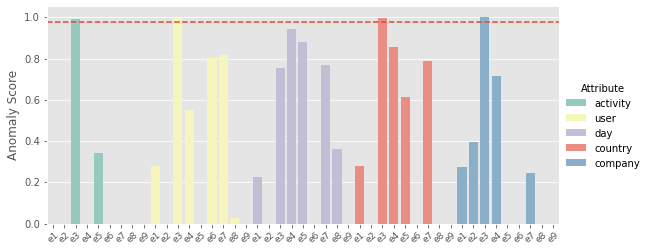

In [ ]:
data=plot_data[plot_data['trace_id']==6].copy()
data['xticks']= [f'e{y+1}' for x in range(5) for y in range(len(data)//5)]
print(len(data))
print(data['anomaly'].iloc[0])
print(data['trace_id'].iloc[0])
times = data.event_id.unique()
g = sns.FacetGrid(data, col="trace_id", hue="Attribute",
                  palette="Set3", height=4, aspect=2)
g.map(sns.barplot, 'event_id', 'Anomaly Score', order=times)
g.add_legend()
ax1 = g.axes[0][0]
g.set_titles(col_template="", row_template="")
g.set_axis_labels('')

ax1.axhline(0.98, ls='--')
for ax in g.axes.flat:
  
    ax.set_xticklabels([f'e{y+1}' for x in range(5) for y in range(len(data)//5)], rotation=40,fontsize=9) # set new labels
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:
def plot_anomaly_scores(trace_id):
    data=plot_data[plot_data['trace_id']==trace_id]
    print(len(data))
    print(data['anomaly'].iloc[0])
    print(data['trace_id'].iloc[0])
    times = data.event_id.unique()
    g = sns.FacetGrid(data, col="trace_id", hue="Attribute",
                      palette="Set3", height=4, aspect=2)
    g.map(sns.barplot, 'event_id', 'Anomaly Score', order=times)
    g.add_legend()
    ax1 = g.axes[0][0]
    g.set_titles(col_template="", row_template="")
    g.set_axis_labels('')
    ax1.axhline(0.98, ls='--')
    for ax in g.axes.flat:

        ax.set_xticklabels([f'e{y+1}' for x in range(5) for y in range(len(data)//5)], rotation=50,fontsize=11) # set new labels
    plt.show()

40
normal
1


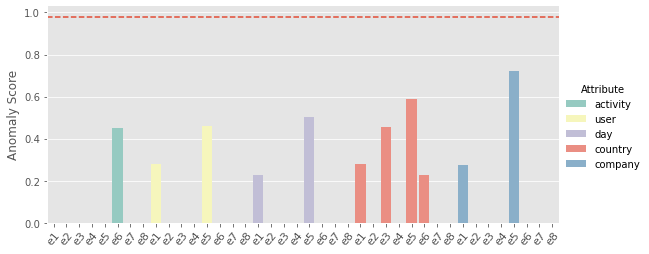

In [ ]:
plot_anomaly_scores(1)

45
SkipSequence
6


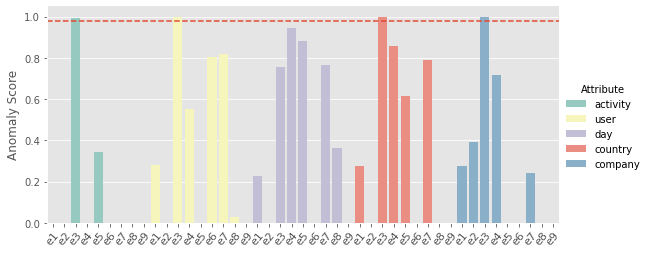

In [ ]:
plot_anomaly_scores(6)